In [ ]:
#1
!pip install wordcloud
!pip install xgboost
!pip install emoji

In [ ]:
#2
import pandas as pd
import numpy as np
import glob, os, re, csv, string
import matplotlib.pyplot as plt
import seaborn as sns
import itertools, collections
from datetime import datetime

import re
import emoji
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator


from sklearn.model_selection import train_test_split, StratifiedKFold, ParameterGrid
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score, accuracy_score

import unicodedata, string

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#2
import nltk
from nltk import bigrams
from nltk.tokenize import TweetTokenizer, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [ ]:
#3
import numpy as np
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Loading Datasets

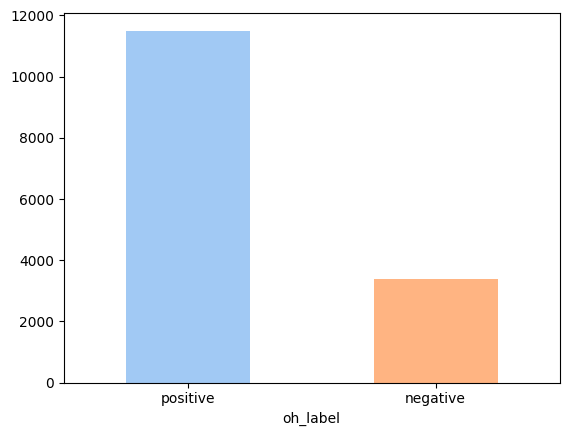

In [ ]:
#4
df_sexism = pd.read_csv('/kaggle/input/fin-nlp/twitter_sexism_parsed_dataset.csv')
df_sexism['Text'].sample(1).values[0]
df_sexism['oh_label'].value_counts().plot(kind = 'bar', color = sns.color_palette('pastel'))
plt.xticks([0,1],['positive', 'negative'], rotation = 0);

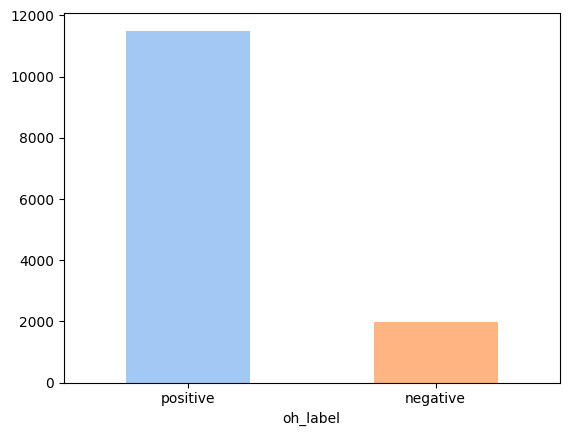

In [ ]:
df_racism = pd.read_csv('/kaggle/input/fin-nlp/twitter_racism_parsed_dataset.csv')
df_racism['Text'].sample(1).values[0]
df_racism['oh_label'].value_counts().plot(kind = 'bar', color = sns.color_palette('pastel'))
plt.xticks([0,1],['positive', 'negative'], rotation = 0);

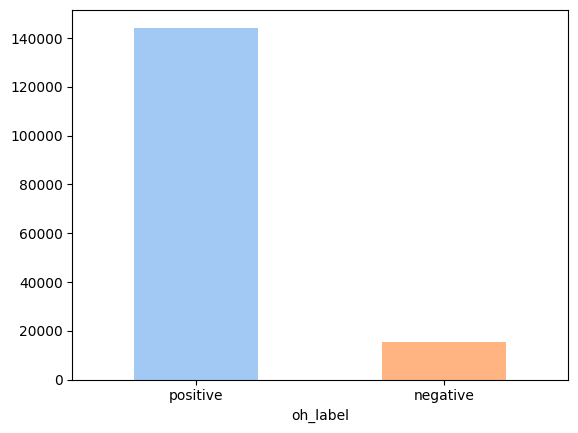

In [ ]:
df_toxic = pd.read_csv("/kaggle/input/fin-nlp/toxicity_parsed_dataset.csv")
df_toxic.head()
df_toxic['Text'].sample(1).values[0]
df_toxic['oh_label'].value_counts().plot(kind = 'bar', color = sns.color_palette('pastel'))
plt.xticks([0,1],['positive', 'negative'], rotation = 0);

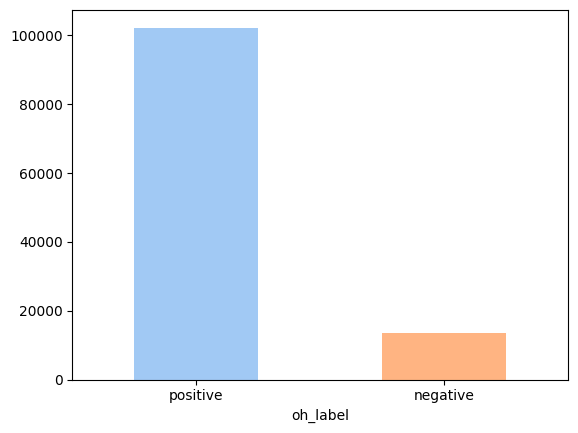

In [ ]:
df_attack = pd.read_csv("/kaggle/input/fin-nlp/attack_parsed_dataset.csv")
df_attack.head()
df_attack['Text'].sample(1).values[0]
df_attack['oh_label'].value_counts().plot(kind = 'bar', color = sns.color_palette('pastel'))
plt.xticks([0,1],['positive', 'negative'], rotation = 0);

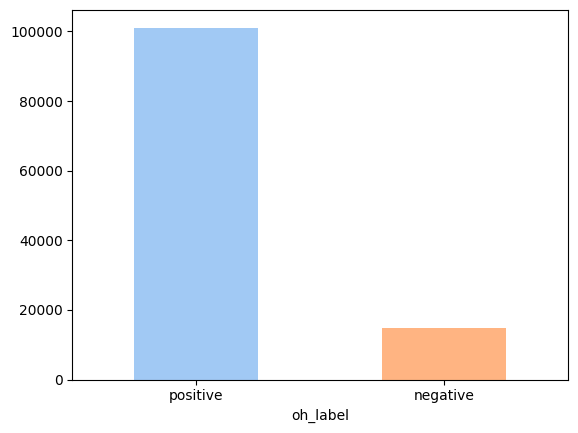

In [ ]:
df_aggretion = pd.read_csv("/kaggle/input/fin-nlp/aggression_parsed_dataset.csv")
df_aggretion.head()
df_aggretion['Text'].sample(1).values[0]
df_aggretion['oh_label'].value_counts().plot(kind = 'bar', color = sns.color_palette('pastel'))
plt.xticks([0,1],['positive', 'negative'], rotation = 0);

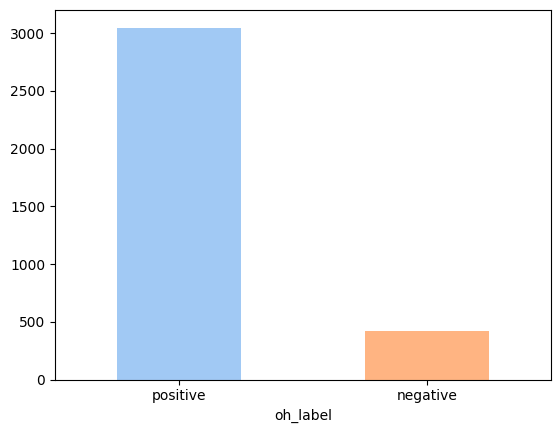

In [ ]:
df_youtube = pd.read_csv("/kaggle/input/fin-nlp/youtube_parsed_dataset.csv")
df_youtube.head()
df_youtube['Text'].sample(1).values[0]
df_youtube['oh_label'].value_counts().plot(kind = 'bar', color = sns.color_palette('pastel'))
plt.xticks([0,1],['positive', 'negative'], rotation = 0);

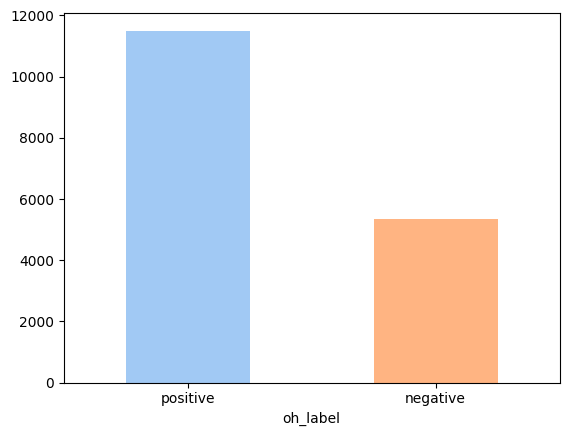

In [ ]:
df_twitter = pd.read_csv("/kaggle/input/fin-nlp/twitter_parsed_dataset.csv")
df_twitter.head()
df_twitter['Text'].sample(1).values[0]
df_twitter['oh_label'].value_counts().plot(kind = 'bar', color = sns.color_palette('pastel'))
plt.xticks([0,1],['positive', 'negative'], rotation = 0);

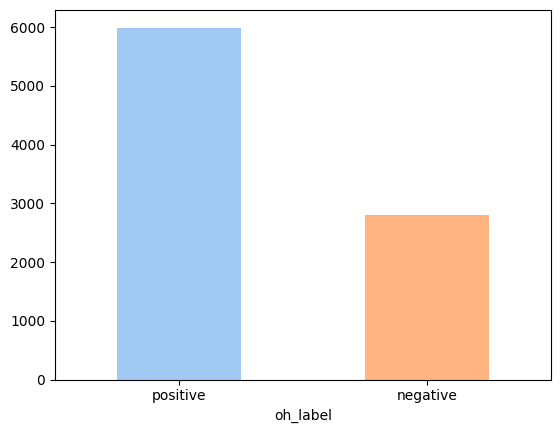

In [ ]:
df_kaggle = pd.read_csv("/kaggle/input/fin-nlp/kaggle_parsed_dataset.csv")
df_kaggle.head()
df_kaggle['Text'].sample(1).values[0]
df_kaggle['oh_label'].value_counts().plot(kind = 'bar', color = sns.color_palette('pastel'))
plt.xticks([0,1],['positive', 'negative'], rotation = 0);

In [ ]:
#5
import pandas as pd
from sklearn.utils import shuffle


dfs = [df_sexism, df_racism, df_toxic, df_attack, df_aggretion, df_youtube, df_youtube,df_twitter,df_kaggle]

df_combined = pd.concat(dfs, ignore_index=True)

df_combined = shuffle(df_combined, random_state=42).reset_index(drop=True)

In [ ]:
#6
df_combined.to_csv('cleaned_data2.csv', index=False)

In [ ]:
df_combined.head(20)

,index,id,Text,Annotation,oh_label,ed_label_0,ed_label_1,UserIndex,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,Date
0,70985,NaN,"As previously written in discussion, per wikip...",NaN,0.0,0.900000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68645,NaN,", nor is another Wikipedia",NaN,0.0,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.72334634404463E+017,5.72334634404463E+017,#MKR Fuck you Colin! That was total shite!,none,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6088,NaN,"""You are a moron!""",NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20120528004449Z
4,5.68547825643967E+017,5.68547825643967E+017,@KellyTurner99 @buellerishere @isra_jourisra @...,none,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,150188,NaN,"== Ways to improve Gulrej khan king == Hi, ...",NaN,0.0,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,72600,NaN,Bench press== Does bench press help distinguis...,NaN,0.0,0.800000,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,77317,NaN,I still see abundant links to common terms tha...,NaN,0.0,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,50209,NaN,I'm still in the process of perfecting this ...,NaN,0.0,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,98592,NaN,== Title edit == I was wondering if you c...,NaN,0.0,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Selecting only useful columns of Datasets

In [ ]:
#7
df = df_combined[['index','oh_label','Text']]
df.head()

,index,oh_label,Text
0,70985,0.0,"As previously written in discussion, per wikip..."
1,68645,0.0,", nor is another Wikipedia"
2,5.72334634404463E+017,0.0,#MKR Fuck you Colin! That was total shite!
3,6088,1.0,"""You are a moron!"""
4,5.68547825643967E+017,0.0,@KellyTurner99 @buellerishere @isra_jourisra @...


# Renaming the Selected Columns

In [ ]:
#8
# Before renaming the columns
print("\nBefore modifying column names:\n", df.columns)

df.rename(columns = {'index':'id','oh_label':'label','Text':'tweet'}, inplace = True)

# After renaming the columns
print("\nAfter modifying first column:\n", df.columns)


Before modifying column names:
 Index(['index', 'oh_label', 'Text'], dtype='object')

After modifying first column:
 Index(['id', 'label', 'tweet'], dtype='object')


# Splitting the Dataset into Train and Test dataset

In [ ]:
#9
train2, test2 = train_test_split(df, test_size=0.3,random_state=10, shuffle=True)

train2 = train2[['id','label','tweet']]
test2 = test2[['id','tweet']]

print("Training Set 2 :"% train2.columns, train2.shape)
print("Test Set 2 :"% test2.columns, test2.shape)
print('Train Set 2 -----')
print(train2.isnull().sum())
print('Test Set 2 -----')
print(test2.isnull().sum())
train2.head()

Training Set 2 : (316640, 3)
Test Set 2 : (135704, 2)
Train Set 2 -----
id       0
label    5
tweet    2
dtype: int64
Test Set 2 -----
id       0
tweet    0
dtype: int64


,id,label,tweet
324353,134882,0.0,"::::::: I would staunchly disagree, David's c..."
117998,74357,0.0,::There you go as per your request I have re...
271341,5.52305714249863E+017,0.0,RT @Angel__Kitty: These women are fighting aga...
411123,92235,0.0,`see quite the little edit war has broken out ...
364648,27144,0.0,`The other justification given for the block w...


# Merging Train and Test Datasets from Dataset1 and Dataset2

In [ ]:
#10
train = pd.concat([train2], ignore_index = True)
train.shape

(316640, 3)

In [ ]:
#11
train['label'].value_counts()

label
0.0    275991
1.0     40644
Name: count, dtype: int64

In [ ]:
#12
# Merging two Test Data Sets
test = pd.concat([test2], ignore_index = True)
test.shape

(135704, 2)

# Data Analysis and Cleaning

In [ ]:
#13
import pandas as pd
import numpy as np
import re
from sklearn.utils import resample

def clean_text(df, text_field):
    df[text_field] = df[text_field].astype(str).str.lower()  # Convert to string and lowercase
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    return df

# Assuming 'test' and 'train' DataFrames are already defined
test_clean = clean_text(test, "tweet")
train_clean = clean_text(train, "tweet")

train_majority = train_clean[train_clean.label == 0]
train_minority = train_clean[train_clean.label == 1]

train_minority_upsampled = resample(train_minority,
                                    replace=True,
                                    n_samples=len(train_majority),
                                    random_state=123)

train_upsampled = pd.concat([train_minority_upsampled, train_majority])
print(train_upsampled['label'].value_counts())


label
1.0    275991
0.0    275991
Name: count, dtype: int64


In [ ]:
#14
train_upsampled

,id,label,tweet
122111,21719,1.0,radisson not raddison you idiot enough said
217720,4.16972627274506E+017,1.0,im not sexist but i do not like that the fir...
137492,99816,1.0,tiptoety your judgemts seems to consits of he...
119129,60443,1.0,alqaedia is after you
60616,107059,1.0,dmacks is a fucking faggot you heard faggot
...,...,...,...
316634,88273,0.0,fdsafdsafda what the fukk is this sh1t wh...
316636,152737,0.0,first of all i have told to many pages fro...
316637,59868,0.0,hey carl feynman is not as interesting as his ...
316638,4472,0.0,werd to ya actually the version you push ...


# **Visualizing the Data**

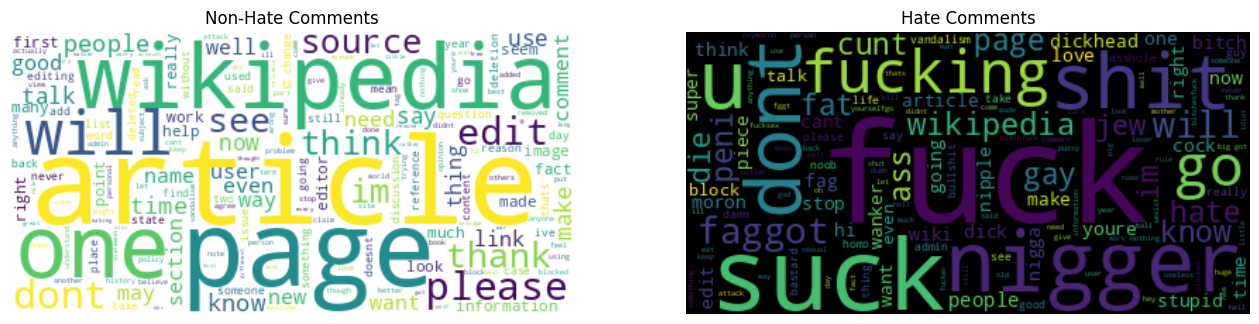

In [ ]:
#15
fig, axs = plt.subplots(1,2 , figsize=(16,8))
text_pos = " ".join(train_clean['tweet'][train.label == 0])
text_neg = " ".join(train_clean['tweet'][train.label == 1])
train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Comments')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Comments')

plt.show()

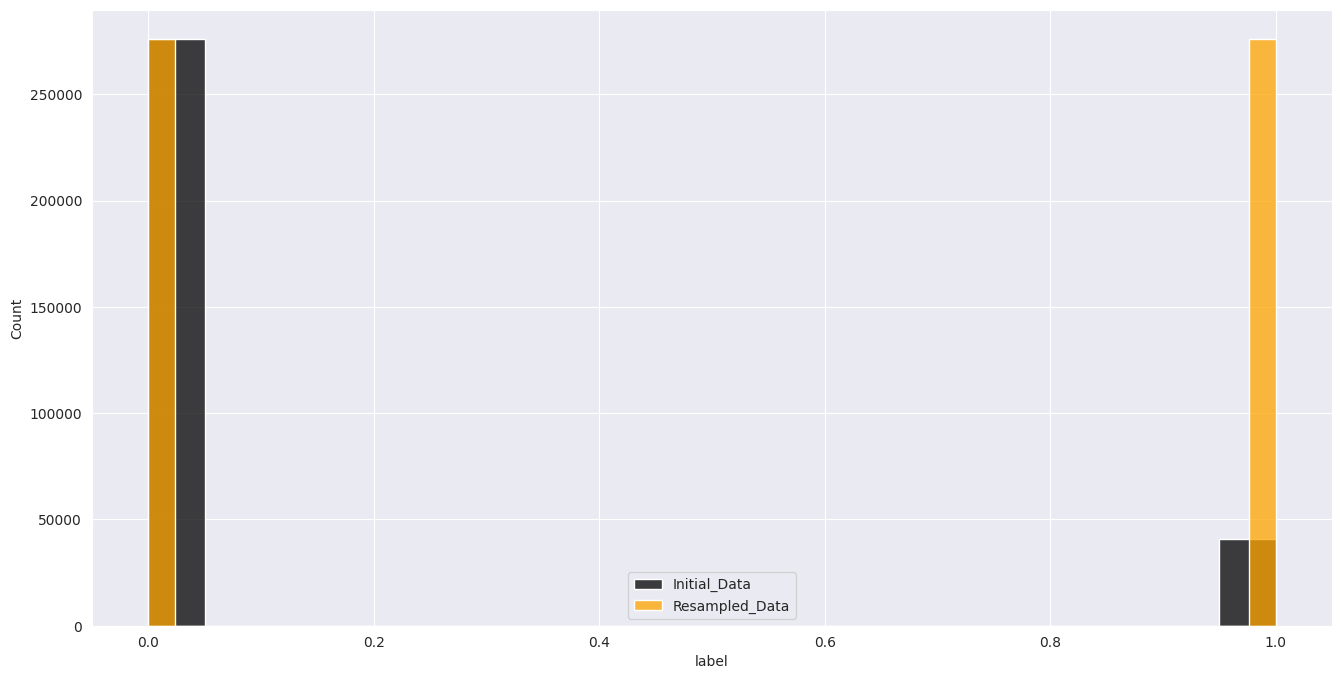

In [ ]:
#16
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
sns.histplot(data = train['label'], color='black', legend=True)
sns.histplot(data = train_upsampled['label'], color = 'orange', legend=True)
plt.legend(['Initial_Data', 'Resampled_Data'])
plt.show()

--------------After Upsampling the Minority Class---------------


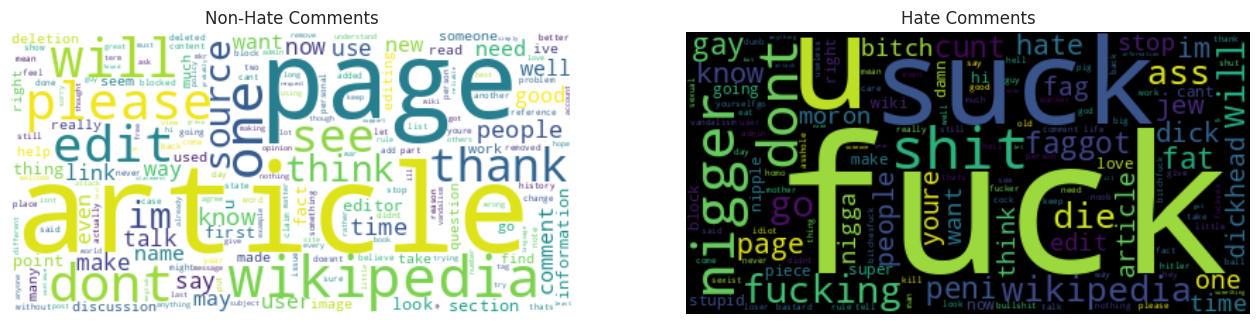

In [ ]:
#17
print('--------------After Upsampling the Minority Class---------------')

fig, axs = plt.subplots(1,2 , figsize=(16,8))
text_pos = " ".join(train_upsampled['tweet'][train.label == 0])
text_neg = " ".join(train_upsampled['tweet'][train.label == 1])
train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Comments')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Comments')

plt.show()

In [ ]:
#18
dt_trasformed = train_upsampled[['label', 'tweet']]
y = dt_trasformed.iloc[:, :-1].values

In [ ]:
#19
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Assuming 'y' is your target variable

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
y = np.array(ct.fit_transform(y))

y


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
#20
print(y.shape)

(551982, 2)


In [ ]:
#21
y_df = pd.DataFrame(y)
y_hate = np.array(y_df[0])
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
#22
cv = CountVectorizer(max_features = 2000)
x = cv.fit_transform(train_upsampled['tweet']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#23
x.shape

(551982, 2000)

# **Train & Test splitting the Data**

In [ ]:
#24
x_train, x_test, y_train, y_test = train_test_split(x, y_hate, test_size = 0.30, random_state = 1)

# **Testing With Different Models**
**Gaussian Naive Bayes, Decision Tree, K Nearest Neighbors,Logistic Regression**

In [ ]:
#25
import time

from sklearn.naive_bayes import GaussianNB

# Assuming 'x_train' and 'y_train' are your training features and labels, respectively

# Using Naive Bayes Classifier
classifier_np = GaussianNB()

# Start timer
start_time = time.time()

classifier_np.fit(x_train, y_train)

# End timer
end_time = time.time()


In [ ]:
#26
# Calculate training time
training_time = end_time - start_time

print(f"Training time of Naive Bayes: {training_time:.6f} seconds")

Training time of Naive Bayes: 23.429851 seconds


In [ ]:
#27
import pickle

# save the model to disk
filename = 'twitter_with_two_dataset_model_GaussianNB.sav'
pickle.dump(classifier_np, open(filename, 'wb'))

# **Decision Tree**

In [ ]:
#28
from sklearn.tree import DecisionTreeClassifier

# Using Decision Tree

classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# Start timer
start_time = time.time()

classifier_dt.fit(x_train, y_train)

# End timer
end_time = time.time()

In [ ]:
#29
# Calculate training time
training_time = end_time - start_time

print(f"Training time of Decision Tree: {training_time:.6f} seconds")

Training time of Decision Tree: 534.174285 seconds


In [ ]:
#30
# save the model to disk
filename = 'twitter_with_two_dataset_model_Decision_Tree.sav'
pickle.dump(classifier_dt, open(filename, 'wb'))

# **K-Nearest Neighbors**

In [ ]:
#31
# Using KNN
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Start timer
start_time = time.time()

classifier_knn.fit(x_train, y_train)

# End timer
end_time = time.time()

In [ ]:
#32
# Calculate training time
training_time = end_time - start_time

print(f"Training time of KNN: {training_time:.6f} seconds")

Training time of KNN: 0.036240 seconds


In [ ]:
#33
# save the model to disk
filename = 'twitter_with_two_dataset_model_KNN.sav'
pickle.dump(classifier_knn, open(filename, 'wb'))

# **Logistic Regression**

In [ ]:
#34
# Using Logistic Regression
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state = 0)

# Start timer
start_time = time.time()

classifier_lr.fit(x_train, y_train)

# End timer
end_time = time.time()

In [ ]:
#35
# Calculate training time
training_time = end_time - start_time

print(f"Training time of Logistic Regression: {training_time:.6f} seconds")

Training time of Logistic Regression: 74.477395 seconds


In [ ]:
#36
# save the model to disk
filename = 'twitter_with_two_dataset_model_Logistic_Regression.sav'
pickle.dump(classifier_lr, open(filename, 'wb'))

In [ ]:
print(1)

1


# Confusion Matrix for Different Models

## Naive Bayes

In [ ]:
!pip install wordcloud
!pip install wordcloud
!pip install git+https://github.com/shankarpandala/lazypredict.git
!pip install collabfilter


  Cloning https://github.com/shankarpandala/lazypredict.git to /tmp/pip-req-build-vzgyc6fp
  Running command git clone --filter=blob:none --quiet https://github.com/shankarpandala/lazypredict.git /tmp/pip-req-build-vzgyc6fp
  fatal: unable to access 'https://github.com/shankarpandala/lazypredict.git/': Could not resolve host: github.com
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/shankarpandala/lazypredict.git /tmp/pip-req-build-vzgyc6fp did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/shankarpandala/lazypredict.git /tmp/pip-req-build-vzgyc6fp did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
^C


[[19476 63486]
 [ 1057 81576]]


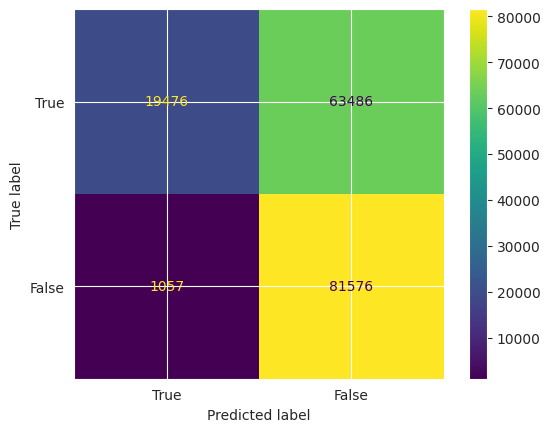

y_hat_shape for Naive Bayes:  (165595, 2)
FPR for Naive Bayes:  [0.         0.75604494 0.75615342 ... 0.86580603 0.86607121 1.        ]
TPR for Naive Bayes:  [0.         0.98634928 0.98634928 ... 0.99410647 0.99410647 1.        ]
AUC for Naive Bayes:  0.6153


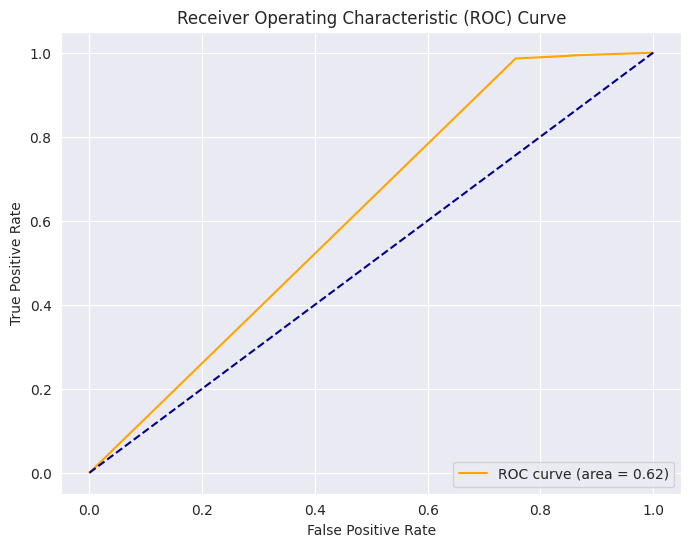

In [ ]:
#37
import wordcloud
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Создаем и обучаем классификатор Naive Bayes
classifier_np = GaussianNB()
classifier_np.fit(x_train, y_train)  # Обучение на тренировочных данных

# Предсказания на тестовых данных
y_pred_np = classifier_np.predict(x_test)

# Создание матрицы ошибок
cm = confusion_matrix(y_test, y_pred_np)
print(cm)

# Визуализация матрицы ошибок
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[True, False])
cm_display.plot()
plt.show()

# Получение вероятностей предсказаний для построения ROC-кривой
yhat_np = classifier_np.predict_proba(x_test)
print('y_hat_shape for Naive Bayes: ', yhat_np.shape)
yhat_np = yhat_np[:, 1]

# Построение ROC-кривой
fpr_np, tpr_np, _ = roc_curve(y_test, yhat_np)
auc_np = round(roc_auc_score(y_test, yhat_np), 4)

# Вывод информации о ROC-кривой
print('FPR for Naive Bayes: ', fpr_np)
print('TPR for Naive Bayes: ', tpr_np)
print('AUC for Naive Bayes: ', auc_np)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr_np, tpr_np, color='orange', label='ROC curve (area = %0.2f)' % auc_np)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Decision Tree

[[82369   593]
 [ 5212 77421]]


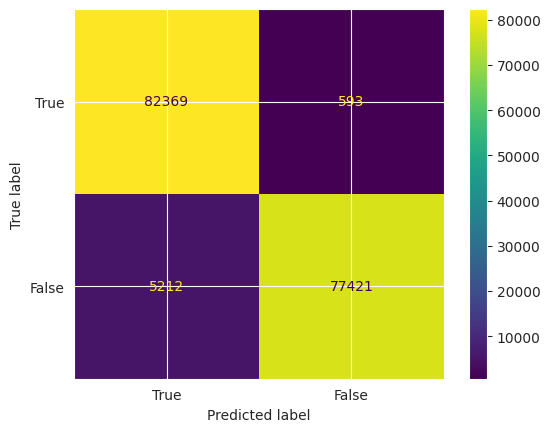

In [ ]:
#38
import wordcloud
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Создаем и обучаем классификатор дерева решений
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(x_train, y_train)  # Обучение на тренировочных данных

# Предсказания на тестовых данных
y_pred_dt = classifier_dt.predict(x_test)

# Создание матрицы ошибок
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

# Визуализация матрицы ошибок
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[True, False])
cm_display.plot()
plt.show()


y_hat_shape for Decision Tree:  (165595, 2)
FPR for Decision Tree:  [0.         0.00154288 0.00155493 0.00156698 0.00157904 0.0016393
 0.00172368 0.00173573 0.00175984 0.001796   0.00182011 0.00192859
 0.0019527  0.00201297 0.00202502 0.00263976 0.0066657  0.00689472
 0.00690678 0.00696705 0.0069791  0.00703937 0.00711169 0.00714785
 0.01036619 0.01047468 0.01053494 0.01060727 0.01078807 0.01094477
 0.01098093 0.0138015  0.01386177 0.01403052 0.01406668 0.01407873
 0.02198597 0.02204624 0.02245606 0.02264892 0.02525253 0.02530074
 0.02534895 0.02543333 0.0254936  0.02561414 0.03654685 0.03666739
 0.03670355 0.03682409 0.03869241 0.03912635 0.03921072 0.04873315
 0.04880548 0.04917914 0.04927557 0.05971409 0.05979846 0.06018418
 0.06022034 0.06873026 0.06888696 0.07599865 0.0761674  0.07636026
 0.07643258 0.08307418 0.08317061 0.08333936 0.08831754 0.0930426
 0.09327162 0.0974181  0.09762301 0.10049179 0.10064849 0.10307129
 0.10512042 0.10577132 0.10647043 0.10662713 0.1068682  0.10719

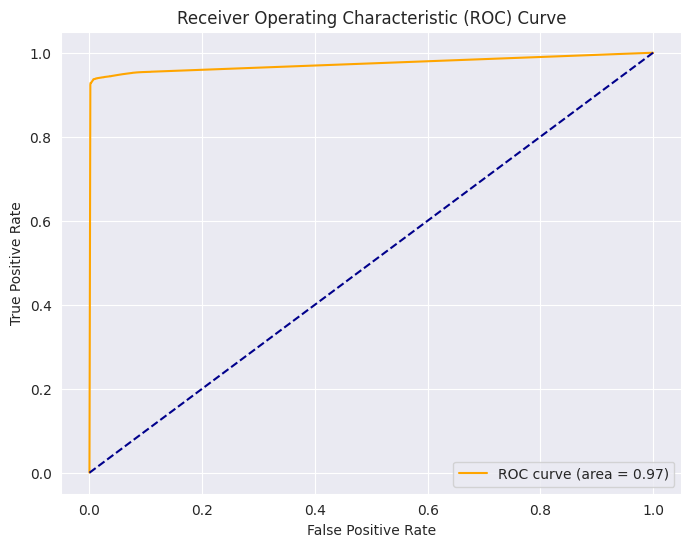

In [ ]:
#39
# Получение вероятностей предсказаний для построения ROC-кривой
yhat_dt = classifier_dt.predict_proba(x_test)
print('y_hat_shape for Decision Tree: ', yhat_dt.shape)
yhat_dt = yhat_dt[:, 1]

# Построение ROC-кривой
fpr_dt, tpr_dt, _ = roc_curve(y_test, yhat_dt)
auc_dt = round(roc_auc_score(y_test, yhat_dt), 4)

# Вывод информации о ROC-кривой
print('FPR for Decision Tree: ', fpr_dt)
print('TPR for Decision Tree: ', tpr_dt)
print('AUC for Decision Tree: ', auc_dt)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='orange', label='ROC curve (area = %0.2f)' % auc_dt)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## K-Nearest Neighbors

In [ ]:
#KNN
y_pred_knn = classifier_knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_knn, labels = [1,0]), display_labels = [True, False])
cm_display.plot()
plt.show()


KeyboardInterrupt



In [ ]:
yhat_knn = classifier_knn.predict_proba(x_test)
print('y_hat_shape for KNN: ',yhat_knn.shape)
yhat_knn = yhat_knn[:, 1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test, yhat_knn)
auc_knn = round(metrics.roc_auc_score(y_test, yhat_knn), 4)

## Logistic Regression

[[67613 15349]
 [ 9156 73477]]


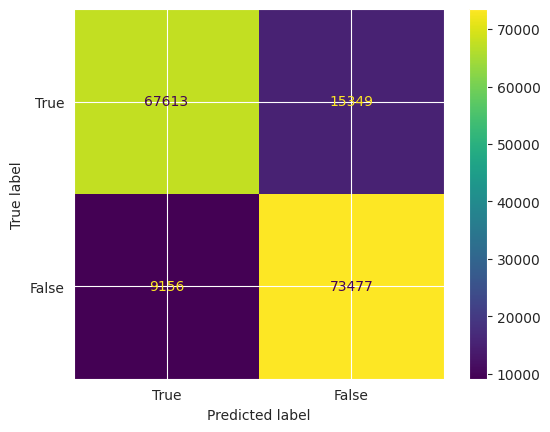

y_hat_shape for Logistic Regression:  (165595, 2)
FPR for Logistic Regression:  [0.         0.         0.         ... 0.99767363 0.99770979 1.        ]
TPR for Logistic Regression:  [0.         0.00153692 0.00171844 ... 1.         1.         1.        ]
AUC for Logistic Regression:  0.927


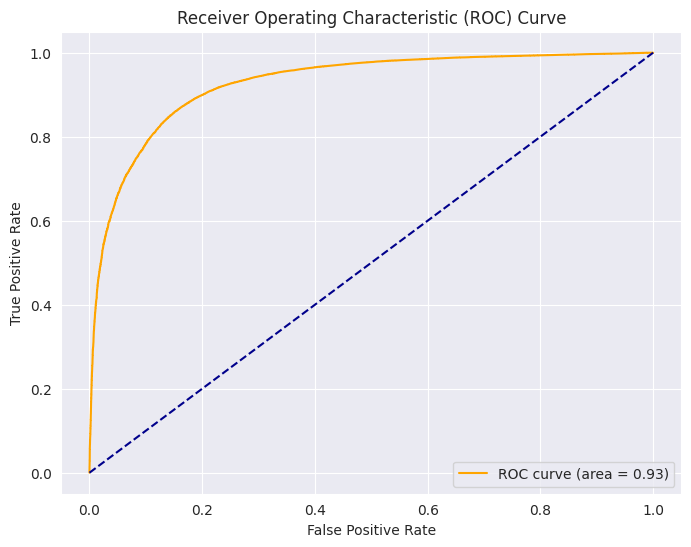

In [ ]:
#40
import wordcloud
# import lazypredict  # Оставляем закомментированным, если он не критичен
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Создаем и обучаем логистическую регрессию
classifier_lr = LogisticRegression()
classifier_lr.fit(x_train, y_train)  # Обучение на тренировочных данных

# Предсказания на тестовых данных
y_pred_lr = classifier_lr.predict(x_test)

# Создание матрицы ошибок
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

# Визуализация матрицы ошибок
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[True, False])
cm_display.plot()
plt.show()

# Получаем вероятности предсказаний для построения ROC-кривой
yhat_lr = classifier_lr.predict_proba(x_test)
print('y_hat_shape for Logistic Regression: ', yhat_lr.shape)
yhat_lr = yhat_lr[:, 1]

# Построение ROC-кривой
fpr_lr, tpr_lr, _ = roc_curve(y_test, yhat_lr)
auc_lr = round(roc_auc_score(y_test, yhat_lr), 4)

# Вывод информации о ROC-кривой
print('FPR for Logistic Regression: ', fpr_lr)
print('TPR for Logistic Regression: ', tpr_lr)
print('AUC for Logistic Regression: ', auc_lr)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='orange', label='ROC curve (area = %0.2f)' % auc_lr)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# **Generating the Accuracy & F1 Score**


In [ ]:
#41
from sklearn.metrics import accuracy_score, f1_score

# Получаем предсказания для логистической регрессии
y_pred_lr = classifier_lr.predict(x_test)

# Вычисляем оценки точности и F1 для логистической регрессии
lr_score = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr, labels=[1, 0])

# Выводим результаты
print('--' * 20)
print('Logistic Regression Accuracy: ', lr_score)
print('Logistic Regression F1 score: ', lr_f1)
print('--' * 20)

# Получаем предсказания для дерева решений
y_pred_dt = classifier_dt.predict(x_test)

# Вычисляем оценки точности и F1 для дерева решений
dt_score = accuracy_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt, labels=[1, 0])

# Выводим результаты
print('--' * 20)
print('Decision Tree Accuracy: ', dt_score)
print('Decision Tree F1 score: ', dt_f1)
print('--' * 20)

# Получаем предсказания для наивного байесовского классификатора
y_pred_np = classifier_np.predict(x_test)

# Вычисляем оценки точности и F1 для наивного байесовского классификатора
np_score = accuracy_score(y_test, y_pred_np)
np_f1 = f1_score(y_test, y_pred_np, labels=[1, 0])

# Выводим результаты
print('--' * 20)
print('Naive Bayes Accuracy: ', np_score)
print('Naive Bayes F1 score: ', np_f1)
print('--' * 20)


----------------------------------------
Logistic Regression Accuracy:  0.8520184788188049
Logistic Regression F1 score:  0.8570795350491954
----------------------------------------
----------------------------------------
Decision Tree Accuracy:  0.9649445937377337
Decision Tree F1 score:  0.9638648714261705
----------------------------------------
----------------------------------------
Naive Bayes Accuracy:  0.6102358162988013
Naive Bayes F1 score:  0.7165374733744702
----------------------------------------
